In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#############################################

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [91]:
df_athletes = pd.read_csv(r'C:\Users\hp\OneDrive\Рабочий стол\Netology AB\FE\athletes.csv')
df_athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [92]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [93]:
for col in df_athletes:
    print(col)
    print(df_athletes[col].unique())

id
[736041664 532037425 435962603 ...  88361042 900065925 711404576]
name
['A Jesus Garcia' 'A Lam Shin' 'Aaron Brown' ... 'di Xiao'
 'le Quoc Toan Tran' 'le Roux Hamman']
nationality
['ESP' 'KOR' 'CAN' 'MDA' 'NZL' 'AUS' 'USA' 'ETH' 'BRN' 'IOA' 'GBR' 'UZB'
 'RSA' 'EGY' 'MAR' 'QAT' 'SUD' 'ALG' 'DEN' 'NED' 'DJI' 'SEN' 'CMR' 'ITA'
 'NIG' 'SWE' 'GHA' 'AFG' 'AZE' 'KSA' 'BAN' 'NGR' 'RUS' 'IND' 'HUN' 'KAZ'
 'BDI' 'ERI' 'POL' 'BRA' 'GEO' 'CZE' 'SEY' 'GAM' 'LTU' 'IRI' 'ROU' 'CUB'
 'SLO' 'BAH' 'ARG' 'PUR' 'FRA' 'RWA' 'TOG' 'MDV' 'TUN' 'ISR' 'LAT' 'JOR'
 'MAS' 'LIB' 'LBA' 'PLE' 'IRQ' 'TUR' 'VEN' 'JPN' 'TPE' 'KGZ' 'CHN' 'MEX'
 'GRE' 'IRL' 'JAM' 'SUI' 'BAR' 'HON' 'ANG' 'GER' 'COL' 'URU' 'MNE' 'SRB'
 'BUL' 'FIN' 'UKR' 'BLR' 'SMR' 'COK' 'SAM' 'AUT' 'BEL' 'KEN' 'SVK' 'POR'
 'ECU' 'UAE' 'NAM' 'GUY' 'EST' 'SKN' 'ARU' 'PAN' 'PER' 'TAN' 'FIJ' 'GUI'
 'NOR' 'ARM' 'THA' 'SIN' 'TKM' 'CRO' 'BIH' 'TGA' 'MAW' 'DOM' 'GUA' 'MKD'
 'TJK' 'CYP' 'CHI' 'MLT' 'ZIM' 'TTO' 'CRC' 'BOL' 'BUR' 'ISL' 'HAI' 'ROT'
 'MGL' 'MAD' 

In [94]:
df_athletes.isna().sum().sort_values(ascending=False)

weight         659
height         330
dob              1
id               0
name             0
nationality      0
sex              0
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [95]:
df_athletes[df_athletes.isna() != False].describe()

,id,height,weight,gold,silver,bronze
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_athletes_1 = df_athletes.dropna()

df_athletes_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [97]:
f'Сохранено {df_athletes_1.count()[0] / df_athletes.count()[0]:.2%} строк файла'

'Сохранено 94.11% строк файла'

In [98]:
# Создаётся параметр для предсказания - выше спортсмен 157 см или нет,
# далее сам параметр height удаляется, т.к. предсказывает со 100% точностью
df_athletes_1['is_height_more_175'] = df_athletes['height'].apply(lambda x: 1 * (x >= 1.75))

df_athletes_1

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,is_height_more_175
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,1
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0,1
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0,0


In [99]:
df_athletes_2 = df_athletes_1.copy()

for col in ['sex', 'nationality', 'sport']:
    print(col)
    for val in list(df_athletes_1[col].unique()):
        print('  ', val)
        df_athletes_2[f'{col}_{val}'] = df_athletes_2[col].apply(lambda x: 1 if x == val else 0)

sex
   male
   female
nationality
   ESP
   KOR
   CAN
   MDA
   NZL
   AUS
   USA
   ETH
   BRN
   GBR
   UZB
   RSA
   EGY
   MAR
   QAT
   SUD
   ALG
   DEN
   NED
   DJI
   SEN
   CMR
   NIG
   SWE
   AFG
   KSA
   IOA
   RUS
   IND
   HUN
   BDI
   ERI
   POL
   BRA
   GEO
   CZE
   SEY
   LTU
   IRI
   ROU
   CUB
   SLO
   BAH
   ITA
   ARG
   PUR
   FRA
   RWA
   TOG
   TUN
   ISR
   NGR
   LAT
   JOR
   MAS
   LIB
   IRQ
   TUR
   VEN
   JPN
   TPE
   KGZ
   CHN
   MEX
   GRE
   IRL
   KAZ
   JAM
   SUI
   BAR
   HON
   ANG
   GER
   COL
   URU
   AZE
   MNE
   SRB
   BUL
   FIN
   UKR
   BLR
   SMR
   COK
   AUT
   BEL
   SVK
   POR
   KEN
   ECU
   LBA
   UAE
   NAM
   GUY
   EST
   SKN
   ARU
   PAN
   PER
   FIJ
   GUI
   ARM
   THA
   SIN
   TKM
   CRO
   BIH
   TGA
   MAW
   DOM
   GUA
   MKD
   TJK
   CYP
   CHI
   MLT
   ZIM
   TTO
   TAN
   CRC
   BOL
   BUR
   ISL
   HAI
   ROT


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


   MGL
   MAD
   GAB
   SRI
   LAO
   MRI
   PAR
   IVB
   GBS
   SYR
   NOR
   CHA
   OMA
   CIV
   GEQ
   GUM
   ASA
   BIZ
   SAM
   VIN
   MON
   ALB
   STP
   BER
   HKG
   CGO
   ANT
   BEN
   LUX
   CAF
   PRK
   GHA
   LIE
   MHL
   NCA
   KIR
   INA
   FSM
   COM
   PLW
   MLI
   ISV
   NRU
   CPV
   ESA
   PHI
   AND
   TUV
   CAY
   NEP
   BOT
   ZAM
   PAK
   SSD
   MTN
   VIE
   MOZ
   BRU
   LCA
   SOL
   VAN
   BHU
   CAM
   GRN
   KOS
   PNG
   PLE
   YEM
   LES
   MYA
   SWZ
   SUR
   COD
   BAN
   DMA
sport
   athletics
   fencing
   taekwondo
   cycling
   triathlon
   volleyball
   aquatics
   rugby sevens
   wrestling
   football
   shooting
   equestrian
   rowing
   judo
   handball
   badminton
   hockey
   modern pentathlon
   table tennis
   canoe
   basketball
   golf
   archery
   weightlifting
   sailing
   tennis
   gymnastics


In [100]:
lst = ['is_height_more_175','height', 'weight',
       'gold', 'silver', 'bronze'
      ] + list(df_athletes_2.columns)[12:-1]

df_athletes_3 = df_athletes_2[lst]

df_athletes_3

,is_height_more_175,height,weight,gold,silver,bronze,sex_male,sex_female,nationality_ESP,nationality_KOR,...,sport_hockey,sport_modern pentathlon,sport_table tennis,sport_canoe,sport_basketball,sport_golf,sport_archery,sport_weightlifting,sport_sailing,sport_tennis
0,0,1.72,64.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.68,56.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1.98,79.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.83,80.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.81,71.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,0,1.64,58.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,0,1.73,63.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,1,1.85,100.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11536,0,1.60,56.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
X_train, X_test, y_train, y_test = train_test_split(df_athletes_3.iloc[:,1:],
                                                    df_athletes_3.iloc[:,0:1], 
                                                    test_size=0.2, random_state=0)

In [104]:
model = LogisticRegression()

In [105]:
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [110]:
y_pred = model.predict(X_test)

In [111]:
fpr, tpr, thres = roc_curve(y_test, y_pred)

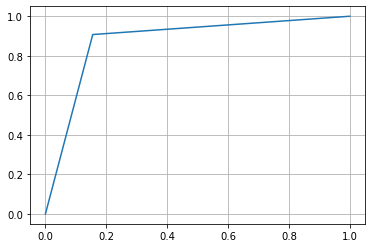

In [112]:
auto_fpr_tpr = pd.DataFrame(fpr, tpr).reset_index()

auto_fpr_tpr.columns=['tpr','fpr']

plt.plot( fpr, tpr )
plt.grid()

In [113]:
f'ROC-AUC = {roc_auc_score(y_test, y_pred):.2%}'

'ROC-AUC = 87.60%'

In [117]:
step = 10000 # Определение шага кривой
predicted_rates = [ (i+1)/step for i in range(step) ]
predicted_rates[:5], predicted_rates[-5:] 

([0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
 [0.9996, 0.9997, 0.9998, 0.9999, 1.0])

In [118]:
tpr_fpr = pd.DataFrame([])

for predicted_rate in predicted_rates:
    tp, fp = 0, 0
    fn, tn = 0, 0
    
    predictions = model.predict_proba(X_test)
    for predicted_prob, actual in zip( list(predictions[:, 1]), list(y_test[y_test.columns[0]]) ):     
        
        if predicted_prob >= predicted_rate:
            predicted = 1
        else:
            predicted = 0
            
        if   predicted == 1 and actual == 1:
            tp += 1
        elif predicted == 1 and actual == 0:
            fp += 1
        elif predicted == 0 and actual == 1:
            fn += 1
        elif predicted == 0 and actual == 0:
            tn += 1
    
    tpr_fpr = tpr_fpr.append(pd.DataFrame([predicted_rate, tp, fp, fn, tn]).T)

tpr_fpr.columns=['predicted_rate','tp','fp','fn','tn']

tpr_fpr = tpr_fpr.set_index('predicted_rate')
    
tpr_fpr

,tp,fp,fn,tn
predicted_rate,,,,
0.0001,1188.0,971.0,0.0,13.0
0.0002,1188.0,966.0,0.0,18.0
0.0003,1188.0,962.0,0.0,22.0
0.0004,1188.0,962.0,0.0,22.0
0.0005,1188.0,961.0,0.0,23.0
...,...,...,...,...
0.9996,82.0,0.0,1106.0,984.0
0.9997,72.0,0.0,1116.0,984.0
0.9998,59.0,0.0,1129.0,984.0


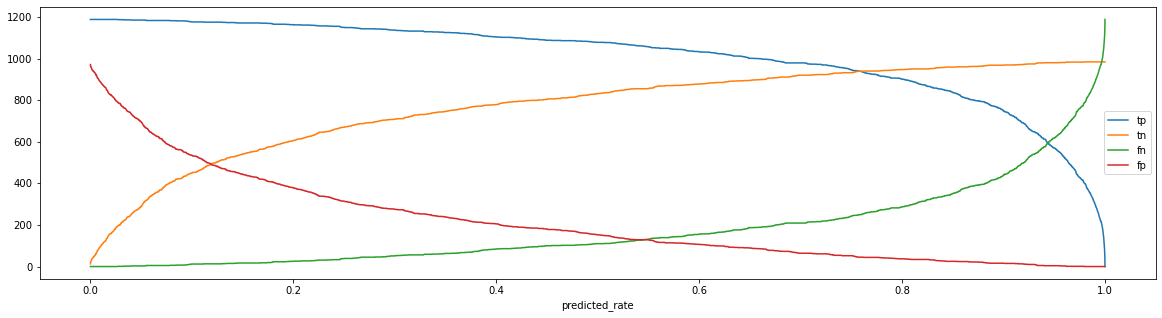

In [119]:
tpr_fpr[['tp','tn','fn','fp']].plot(figsize=(20,5));

In [120]:
tpr_fpr['accuracy'] = (tpr_fpr['tp'] + tpr_fpr['tn']) / ( tpr_fpr['tp'] + tpr_fpr['tn'] + 
                                                        tpr_fpr['fp'] + tpr_fpr['fn']
                                                       )

tpr_fpr['fpr'] = tpr_fpr['fp'] / ( tpr_fpr['fp'] + tpr_fpr['tn'])

tpr_fpr['tpr'] = tpr_fpr['tp'] / ( tpr_fpr['tp'] + tpr_fpr['fn'])

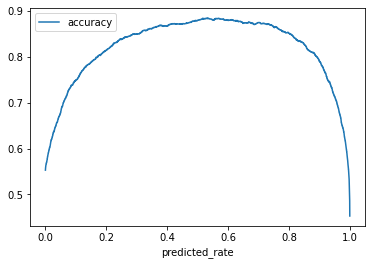

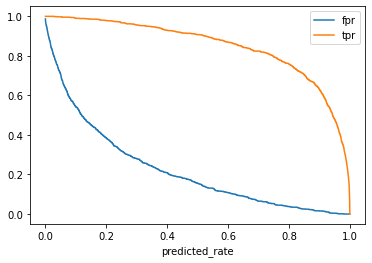

In [121]:
tpr_fpr[['accuracy']].plot();
tpr_fpr[['fpr','tpr']].plot();

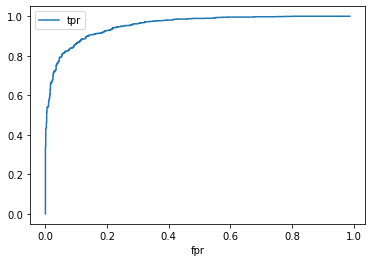

In [122]:
tpr_fpr[['fpr','tpr']].set_index('fpr').plot(label='ROC ручная');

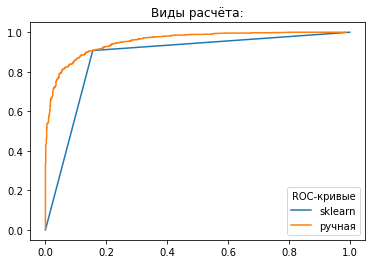

In [123]:
plt.plot( auto_fpr_tpr['fpr'], 
          auto_fpr_tpr['tpr'], label='sklearn' );
plt.plot( tpr_fpr['fpr'], 
          tpr_fpr['tpr'], label='ручная' );
plt.legend(title='ROC-кривые')
plt.title('Виды расчёта:');

In [131]:
tpr_fpr['precision'] = tpr_fpr['tp'] / (tpr_fpr['tp'] + tpr_fpr['fp'])

tpr_fpr['recall'] = tpr_fpr['tp'] / (tpr_fpr['tp'] + tpr_fpr['fn'])

tpr_fpr['precision']  = tpr_fpr['precision'].fillna(1)

tpr_fpr

,tp,fp,fn,tn,accuracy,tpr,fpr,precision,recall
predicted_rate,,,,,,,,,
0.0001,1188.0,971.0,0.0,13.0,0.552947,1.000000,0.986789,0.550255,1.000000
0.0002,1188.0,966.0,0.0,18.0,0.555249,1.000000,0.981707,0.551532,1.000000
0.0003,1188.0,962.0,0.0,22.0,0.557090,1.000000,0.977642,0.552558,1.000000
0.0004,1188.0,962.0,0.0,22.0,0.557090,1.000000,0.977642,0.552558,1.000000
0.0005,1188.0,961.0,0.0,23.0,0.557551,1.000000,0.976626,0.552815,1.000000
...,...,...,...,...,...,...,...,...,...
0.9996,82.0,0.0,1106.0,984.0,0.490792,0.069024,0.000000,1.000000,0.069024
0.9997,72.0,0.0,1116.0,984.0,0.486188,0.060606,0.000000,1.000000,0.060606
0.9998,59.0,0.0,1129.0,984.0,0.480203,0.049663,0.000000,1.000000,0.049663


In [130]:
ROC_AUC = tpr_fpr.precision.sum() / tpr_fpr.precision.count()

f'ROC-AUC = {ROC_AUC:.2%}'

'ROC-AUC = 85.47%'

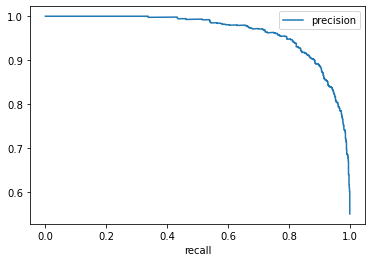

In [134]:
tpr_fpr[['recall','precision']].set_index('recall').plot();

Качество модели достаточно хорошее - для коммерции и ecommerce, в которых бизнес или клиента всегда разнообразнее для достижения 90-95%го качества, поэтому 85% ROC-AUC - достаточно для принятия в работу и дальнейшего улучшения в течение квартала.

Кривая ROC не может прохоидть ниже диагонали, т.к. predicted - округляется в бОльшую сторону, и это обеспечивает выпуклость кривой.